# Домашнее задание

Взять датасет из google диска: https://drive.google.com/file/d/101fYypHh0u56KC5Lq2ywOCOdnh7WPho2/view?usp=sharing. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

Загрузим данные

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv("data/marketing_campaign.csv")
data.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True


In [8]:
data['variant'].describe()

count       10037
unique          2
top       control
freq         5091
Name: variant, dtype: object

In [17]:
data ['converted'] = data['converted'].replace([True, False],[1,0])
data['converted'].tail(5)

10032    1.0
10033    1.0
10034    0.0
10035    1.0
10036    0.0
Name: converted, dtype: float64

In [20]:
#посчитаем конверсию по каждой группе
data['converted'].groupby(data['variant']).value_counts()

variant          converted
control          0.0          4705
                 1.0           371
personalization  0.0          4241
                 1.0           705
Name: converted, dtype: int64

Формулируем гипотезы:
- "нулевая" (H0) - наблюдаемые различия незначимы
- "альтернативная" (H1) - различия значимы

Так как метрика у нас доля (конверсия) - то в качестве критерия берем z-критерий, уровень значимости 0.05.

In [22]:
import numpy as np


z_crit_value = 1.96 #соответствует доверительному интервалу в 95%
k1, n1 = data[data['variant']=='control']['converted'].sum(), data[data['variant']=='control'].shape[0]
k2, n2 = data[data['variant']=='personalization']['converted'].sum(), data[data['variant']=='personalization'].shape[0]
k1, k2, n1, n2

(371.0, 705.0, 5091, 4946)

Посчитаем выборочные p1, p2:

In [23]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.07287369868395208, 0.14253942579862516)

In [24]:
P = (p1*n1+p2*n2)/(n1+n2)
z = (p1-p2)/(P*(1-P)*(1/n1+1/n2))**(1/2)
z

-11.278864170859038

In [25]:
if abs(z) > z_crit_value:
    print("Мы можем отвергнуть нулевую гипотезу!")
else:
    print("Нам не удалось отвергнуть нулевую гипотезу!")

Мы можем отвергнуть нулевую гипотезу!


In [27]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Результаты z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Результаты z_score=-11.279 pvalue=0.000


Значение pvalue < 0.05, значит мы отвергаем нулевую гипотезу, следовательно различия выборок статистически значимы.

In [30]:
grouped = data.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371.0,5076
personalization,705.0,4946


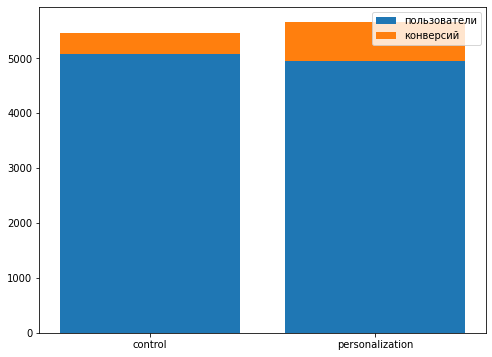

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['converted'], label='пользователи')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='конверсий')
plt.xticks([1, 2], ['control', 'personalization'])
plt.legend();

Визуально разница выборок также заметна. Определим непараметрический критерий Хи-квадрат.

In [34]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000


Результат теста с критерием Хи-квадрат также отвергает нулевую гипотезу, следовательно различия  выборок статистически значимы, принимаем "альтернативную" гипотезу.

#### 1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.

2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.

3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

4) Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.

5) Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.



#### 2. Если мы увеличиваем объем выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал

Выберите один вариант из списка

1) стал более узким
2) возможны оба варианта
3) стал более широким

#### 3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:

Выберите один вариант из списка

1) Значение стандартной ошибки среднего
2) Выборочное среднее значение
3) Среднее значение генеральной совокупности

#### 4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жесткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05. 

#### Если в определенной ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный 

Выберите один вариант из списка

1) 0,1
2) 0,001
3) 0,05
4) 0,5

#### 5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173
2) Вероятность того, что истинное среднее значение больше 172, составляет 0,01
3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.
4) Доверительный интервал не может иметь такие границы, т. к. выборочное стандартное отклонение равняется 10, следовательно доверительный интервал должен быть значительно шире.

#### 6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действиетльно равна 0.4. Как можно оценить результаты?


Какой вариант корректный по вашему мнению и почему?
1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.
2) Вы совершили ошибку первого рода
3) Вы совершили ошибку второго рода

### Ответы:
### вопрос 1: 
2, 3 обусловлено свойствами нормального распределения и центральной предельной теоремой
### вопрос 2: 
1 исходя из формулы определеления доверительного интервала (делим на квадратный корень из количества элементов в выборке)
### вопрос 3: 
2 
### вопрос 4: 
2 (0,001), так как расширяется область принятия нулевой гипотезы
### вопрос 5: 
1 и 3, так как указанные значения находятся вне доверительного интервала
### вопрос 6: 
1, так как ошибка первого рода (α-ошибка, ложноположительное заключение) — ситуация, когда отвергнута верная нулевая гипотеза, а ошибка второго рода (β-ошибка, ложноотрицательное заключение) — ситуация, когда принята неверная нулевая гипотеза. .